# Time Series Forecasting using LSTM(Long Short-Term Memory) networks

## Time Series Analysis

Time Series Analysis is a method of examining the features of the response variable in relation to time as the independent variable. In order to predict or forecast the target variable, utilize the time variable as a reference point. TSA indicates a succession of time-based orders, such as years, months, weeks, days, Horus, minutes, and seconds. It is an observation based on a sequence of discrete time intervals. TSA has real-world applications such as weather forecasting models, stock market predictions, signal processing, and control systems. TSA differs from spatial and other studies in that it produces a set of information in a certain sequence. Typically, a time series has three key components:
Trend: The long-term progression of the series (upward, downward, or stationary).
Seasonality: Regular patterns or fluctuations that repeat over time.
Random or Irregular Movements: Unpredictable variations that do not follow a pattern.

## What Is Time Series Analysis?
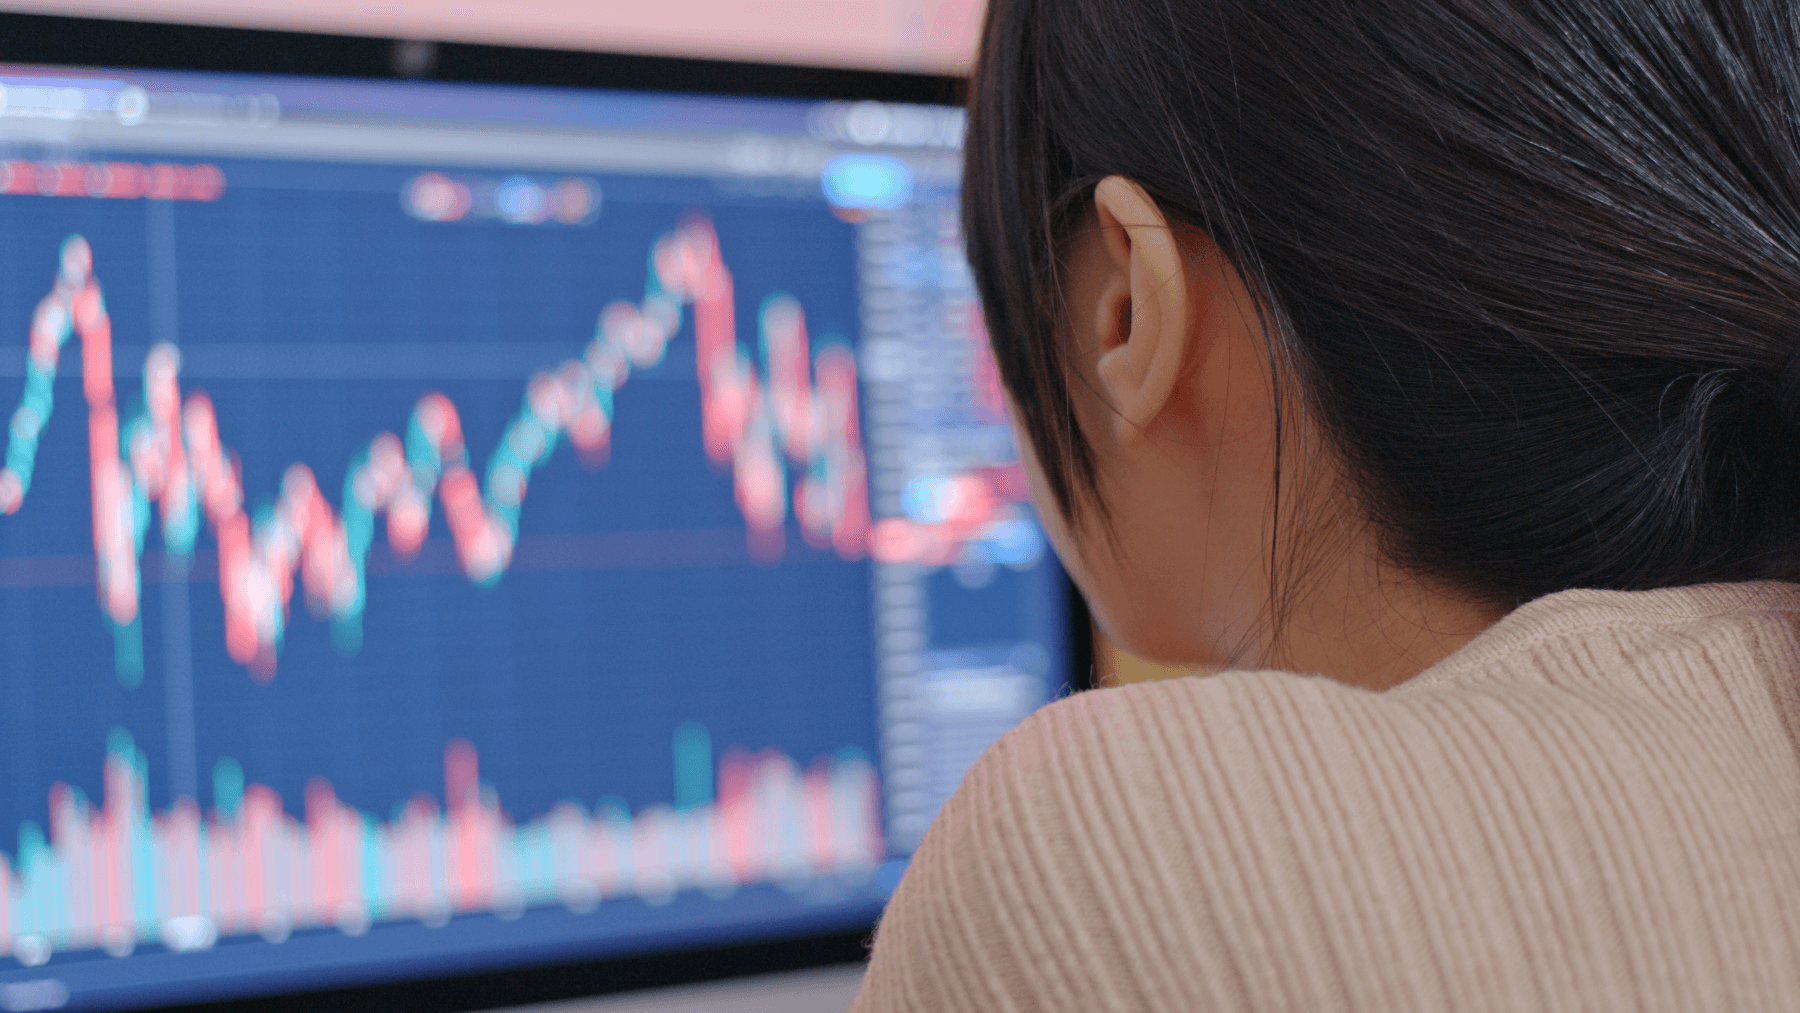

Time series analysis is a method of examining a series of data points obtained over time. TSA analysts record data points at regular intervals over a predetermined period, rather than intermittently or randomly.

## How to Analyze Time Series?

1. Collecting and cleaning data
2. Preparing Visualization of Time vs. Key Features
3. Observing the series' stationarity and creating charts to better comprehend it.
4. Model building: AR, MA, ARMA, ARIMA, and LSTM
5. Extracting insights from prediction.


### Methods of Time Series Analysis

#### Moving Average: 
Used for smoothing time series data to identify trends.
#### Exponential Smoothing: 
Gives more weight to recent observations. Useful for short-term forecasting.
#### ARIMA Models: 
Combines autoregressive (AR) and moving average (MA) models and includes differencing to make the data stationary (Integrated, I).
#### Seasonal Decomposition: 
Breaks a time series into seasonal, trend, and residual components.

### Time Series Forecasting Techniques

#### Statistical Methods: 
Include models like ARIMA (Autoregressive Integrated Moving Average), which are used for non-seasonal data, and SARIMA (Seasonal ARIMA) for seasonal data.

#### Machine Learning Methods: 
Techniques like Random Forest, SVM (Support Vector Machines), and neural networks.

#### Deep Learning Methods: 
Advanced methods like LSTM (Long Short-Term Memory) and RNN (Recurrent Neural Networks) are effective for capturing complex patterns and long-term dependencies in time-series data.

### Relevance of Time Series Forecasting

Decision making is crucial for business planning, economic forecasting, and resource allocation. Helps in identifying trends, cycles, and seasonal variations in data, which is vital for various analytical studies.
In the finance sector, it's used for stock price forecasting, risk management, and portfolio optimization.

### Leveraging Tools like ChatGPT in Time Series Forecasting

ChatGPT can assist in understanding complex time series concepts and methodologies.
It can guide in formulating time series forecasting problems, especially in choosing the right models and techniques. ChatGPT can provide insights into data preprocessing and analysis steps, which are crucial in time series forecasting.

## Long Short-Term Memory (LSTM) Networks 

Long Short Term Memory (LSTM) networks are a form of Recurrent Neural Network that may learn order dependence in sequence prediction tasks. The previous step's output is used as input for the current step in RNN. Hochreiter and Schmidhuber devised the LSTM. It addressed the issue of RNN long-term reliance, in which the RNN cannot predict words stored in long-term memory but can make more accurate predictions using current input. RNN does not function efficiently as the gap length increases. By default, the LSTM may store information for an extended period of time. Its applications include time-series data processing, prediction, and categorization.

In contrast to typical feed-forward neural networks, LSTMs have feedback connections. It can handle both individual data points (such as photographs) and full data streams. LSTM can be applied to tasks such as unsegmented, linked handwriting recognition and speech recognition.

![Alt text](image-3.png)

LSTM has basically three gates.
1. Forget Gate 
2. Input Gate 
3. Output Gate

Long Short Term Memory, or LSTM, is used to store sequential data such as time series and audio. Long Short Term Memory (LSTM) outperforms other models when it comes to learning from long-term dependencies. It addresses the issues raised by RNN (vanishing and exploding gradient difficulties). It operates using gate concepts (forget gate, input gate, and output gate). The following timestamp receives two states: hidden and cell. Long Short Term Memory's ability to forget, remember, and update information places it one step ahead of RNNs.




## Worked Example Problem: Forecasting Google Stock Prices

The worked example problem of forecasting Google's stock prices represents a quintessential application of data science in the realm of finance and economics. It's a complex and multifaceted problem that underscores several key principles and challenges inherent in data science. The quality and quantity of historical stock price data available will significantly influence the accuracy of the model. Stock prices are affected by external factors like economic changes, political events, or company news, which are not always available in the dataset. 

Financial time series data often exhibit non-stationary behavior, where statistical properties change over time. There is a risk of the model overfitting to the historical data, which can lead to poor performance on unseen data. This problem is about predictive analysis using historical data to make informed predictions about future events. This is a fundamental aspect of data science, applicable across numerous domains. The stock market is a critical component of the global economy.

Predicting stock prices, particularly for influential companies like Google, can have significant economic implications. It's a tangible example of how data science can impact financial decision-making and investment strategies. Financial markets are known for their volatility and are influenced by a vast array of factors, from global economic conditions to company-specific news. This makes stock price prediction exceptionally challenging and an excellent case study for exploring advanced data science techniques. The financial sector is a prime example of big data in action. Stock market data is vast, high-dimensional, and often needs to be analyzed in real-time, showcasing the need for sophisticated data processing and analysis techniques. 

Stock prices are a classic example of time series data. Time series analysis involves techniques for analyzing such data to extract meaningful statistics and characteristics. The problem hinges on the concept of learning from data. It involves applying statistical models to understand the past behavior of stock prices and to make predictions about future prices. A key principle in forecasting stock prices is the management of risk and uncertainty. Stock price prediction may involve considering multiple variables (like opening price, closing price, trading volume) and understanding how they interact with each other, which is an essential aspect of multivariate data analysis. This problem also intersects with econometrics, which involves applying statistical methods to economic data. Financial modeling is used to represent the financial performance of assets, investment portfolios, or the entire economy.

![Alt text](image-4.png)

# Data Profiling

In [2]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


# Load the dataset
file_path = '/users/akankshanakati/downloads/GoogleStockPrice.csv'
google_stock_data = pd.read_csv(file_path)

/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Display the first few rows of the dataset to understand its structure
google_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


The dataset contains the following columns:

Date: The date of the stock price record.
Open: The opening price of Google's stock on that day.
High: The highest price of the stock during the day.
Low: The lowest price of the stock during the day.
Close: The closing price of the stock.
Adj Close: The adjusted closing price after accounting for any corporate actions.
Volume: The number of shares traded during the day.

In [4]:
# Descriptive Statistics
descriptive_stats = google_stock_data.describe()
descriptive_stats

,Open,High,Low,Close,Adj Close,Volume
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2.645000e+03
mean,61.723041,62.368079,61.083765,61.744100,61.744100,4.252969e+07
std,35.298521,35.738101,34.873546,35.312279,35.312279,2.656088e+07
min,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06
25%,32.872002,33.205002,32.536499,32.849499,32.849499,2.695400e+07
50%,53.195000,53.799000,52.596001,53.292500,53.292500,3.429860e+07
75%,86.337997,87.341499,85.509003,86.380997,86.380997,4.853542e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,4.621933e+08


Mean prices range around 61-62 units, are the average level of stock prices over the period. The standard deviation is around 35 units for these prices, indicates variability in stock prices. The mean trading volume is about 42.53 million shares.

## What is the Question Being Researched?
The primary question is: "Can we predict future stock prices of a company, Google, based on its historical stock price data?" This question aims to explore the feasibility and accuracy of forecasting stock prices using data science techniques.

## Why is it Interesting?
Stock prices are a crucial aspect of the global economy. Accurate predictions can lead to substantial financial gains and are of great interest to investors, traders, and financial analysts. The stock market is known for its complexity and unpredictability. Predicting stock prices is not just a matter of analyzing historical data but also involves understanding broader economic indicators, market sentiment, and even psychological factors affecting investor behavior. This question represents a real-world application of data science. It challenges practitioners to apply statistical models and machine learning algorithms in a context where data is noisy, non-stationary, and influenced by external factors. Advances in predictive models for stock prices can lead to innovative financial products and investment strategies, impacting the finance industry.

## What is the Theory Behind It?
The theory behind predicting Google stock prices—or any stock prices, from a combination of financial theories, statistical methods, and, increasingly, data science and machine learning techniques. The stock price changes are random and independent of each other. According to this view, past price movements or trends cannot be used to predict future price movements. Machine learning, particularly deep learning methods like LSTM networks, provide new ways to model and predict stock prices. These methods can capture complex patterns in historical data, potentially leading to more accurate predictions. They can account for numerous variables over different time frames, learning from the data in a way that traditional statistical methods cannot. Stock prices are a form of time series data, which requires special analysis methods to handle sequential information. Time series forecasting methods try to capture the underlying patterns in the historical data to make predictions about the future. 



# Data Cleaning

In [5]:
# Data Quality Check
missing_values = google_stock_data.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in this dataset. Handling missing data cannot be performed as there are no missing values.

# Time Series Analysis

In [6]:
# Time Range Analysis
time_range = google_stock_data['Date'].agg(['min', 'max'])
time_range

min    2013-01-02
max    2023-07-06
Name: Date, dtype: object

The dataset covers stock prices from January 2, 2013, to July 6, 2023.

In [7]:
# Converting 'Date' from string to datetime
google_stock_data['Date'] = pd.to_datetime(google_stock_data['Date'])

# Setting 'Date' as the index of the dataframe for time series analysis
google_stock_data.set_index('Date', inplace=True)

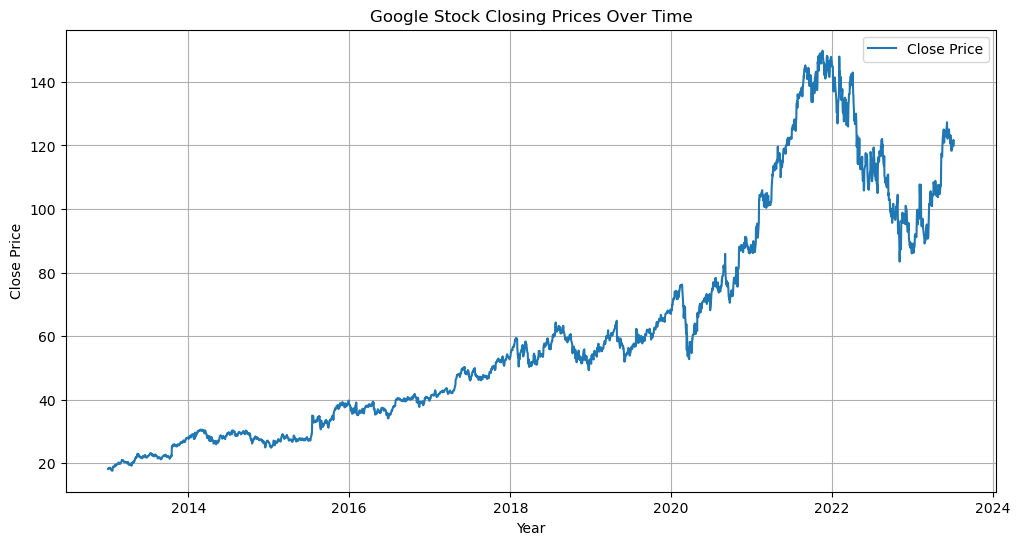

In [8]:
# Trend Analysis: Plotting Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(google_stock_data['Close'], label='Close Price')
plt.title('Google Stock Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above chart shows the trend of Google's stock closing prices over the entire dataset (2013 to 2023). There's a general upward trend in stock prices over this period.

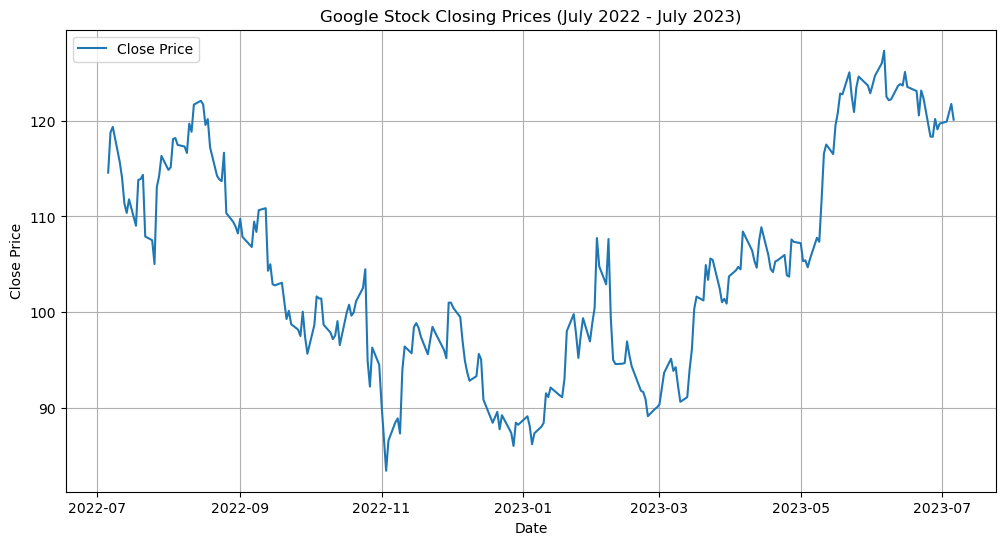

In [9]:
# Seasonality Check: Plotting a year's worth of data to observe potential seasonality
plt.figure(figsize=(12, 6))
one_year_data = google_stock_data['Close'].loc['2022-07-06':'2023-07-06']
plt.plot(one_year_data, label='Close Price')
plt.title('Google Stock Closing Prices (July 2022 - July 2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above chart shows fluctuations in Stock prices, but without further analysis, it's hard to attribute these to specific seasonal effects.

/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


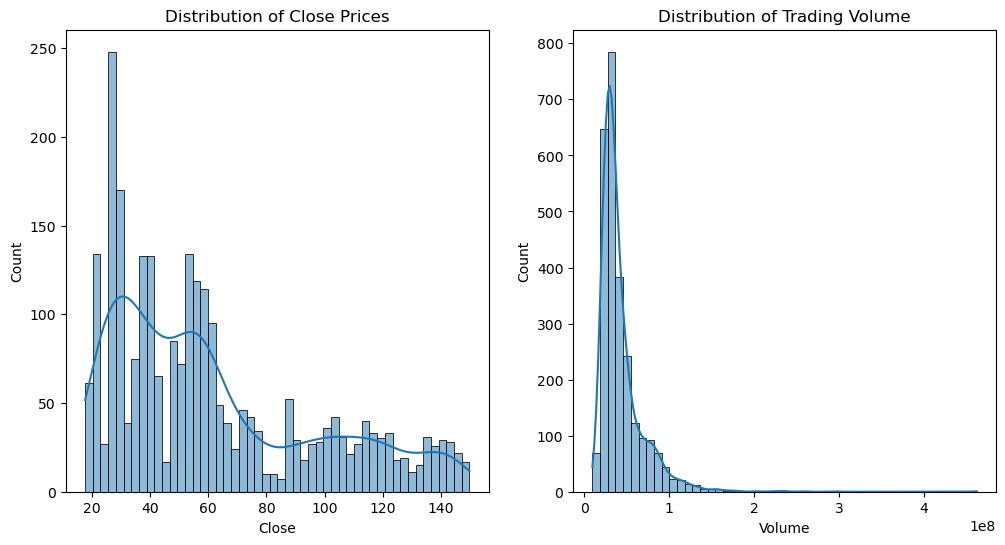

In [10]:
# Distribution Analysis: Histograms for Close Price and Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(google_stock_data['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')

plt.subplot(1, 2, 2)
sns.histplot(google_stock_data['Volume'], bins=50, kde=True)
plt.title('Distribution of Trading Volume')
plt.show()

The above distribution of closing prices appears right-skewed, meaning most of the stock prices are on the lower end, with fewer instances of very high prices. The trading volume distribution is also right-skewed, which indicates most trading days have lower volumes, with a few days experiencing exceptionally high trading volumes.

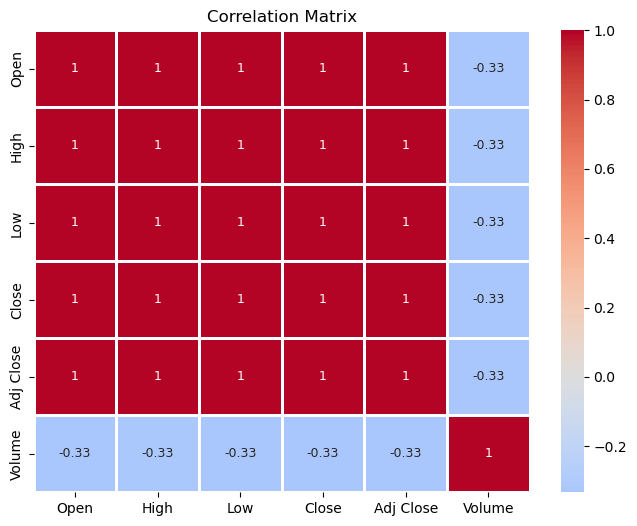

In [11]:
# Correlation Analysis
correlation_matrix = google_stock_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,center=0,linewidths=0.8, annot=True, cmap='coolwarm',annot_kws={"size": 9})
plt.title('Correlation Matrix')
plt.show()

The above correlation matrix reveals strong positive correlations among Open, High, Low, Close, and Adj Close prices, which is expected as these values are typically closely related in stock market data. The Volume shows a comparatively lower correlation with these prices.


# Time Series Decomposition

In [12]:
# Decomposition of Time Series
decomposition = seasonal_decompose(google_stock_data['Close'], model='additive', period=252)  # assuming 252 trading days in a year

# Stationarity Check using Augmented Dickey-Fuller test
adf_test = adfuller(google_stock_data['Close'])

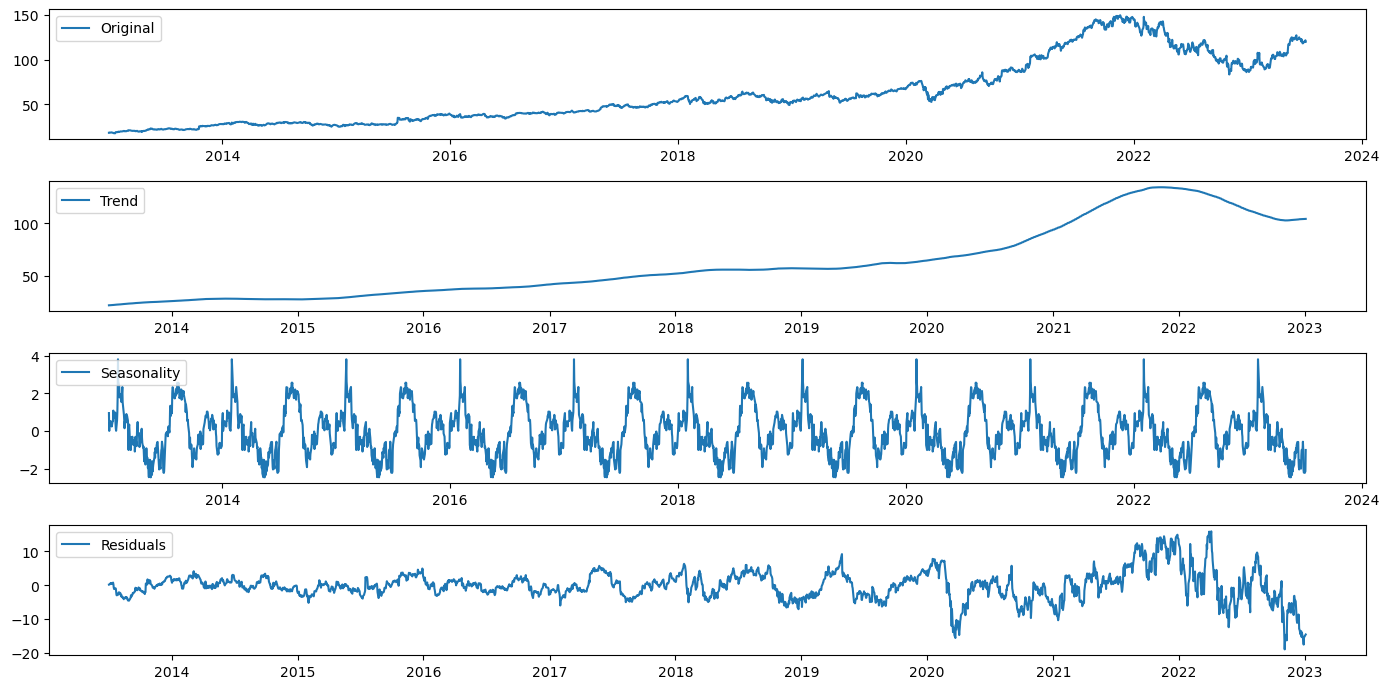

In [13]:
# Plotting the Decomposition
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(google_stock_data['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

The decomposition of the time series into trend, seasonality, and residuals provides the following insights:
There is a clear upward trend visible in the stock price, indicating a general increase over time. The seasonality component does not show a strong, consistent seasonal pattern. This is common in stock price data where seasonality might not be as pronounced. The residuals, which represent the noise in the data after removing trend and seasonality, seem to be quite random.

In [14]:
# Displaying the results of the ADF test
adf_test_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_test_result

{'ADF Statistic': -0.2816820804561302,
 'p-value': 0.9280589286234942,
 'Number of Lags Used': 23,
 'Number of Observations Used': 2621,
 'Critical Values': {'1%': -3.43284741167062,
  '5%': -2.8626433656018726,
  '10%': -2.5673573604457642}}

The ADF test statistic is higher than any of the critical values, and the p-value is significantly higher than 0.05. This suggests that the time series is not stationary.
As the time series is not stationary, we need to transform it to a stationary series before applying time series forecasting models.

In [15]:
# Differencing the series to achieve stationarity
google_stock_data['Close_diff'] = google_stock_data['Close'].diff()
google_stock_data.dropna(inplace=True)  # Dropping NA values created by differencing

# Running ADF test again on the differenced series
adf_test_diff = adfuller(google_stock_data['Close_diff'])

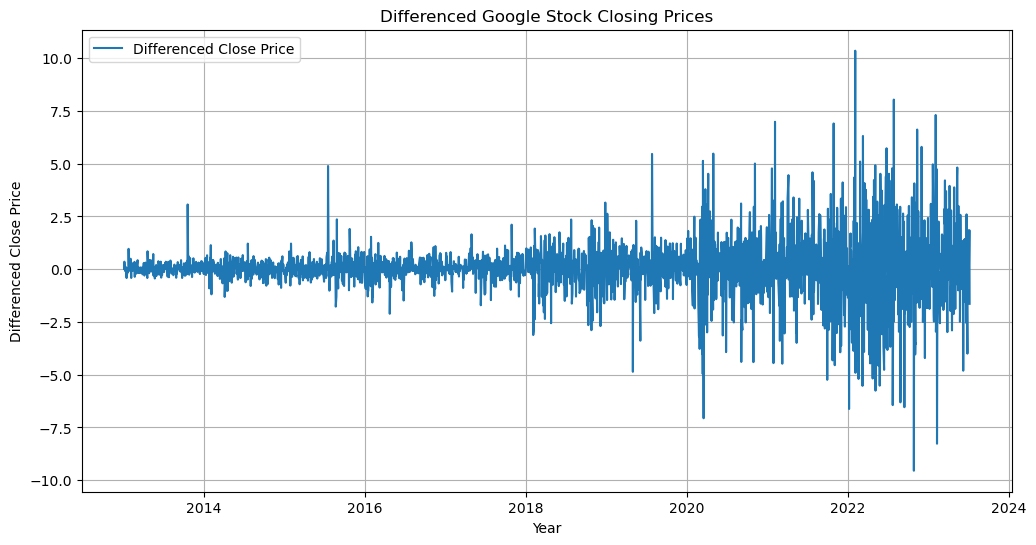

In [16]:
# Plotting the differenced series
plt.figure(figsize=(12, 6))
plt.plot(google_stock_data['Close_diff'], label='Differenced Close Price')
plt.title('Differenced Google Stock Closing Prices')
plt.xlabel('Year')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.grid(True)
plt.show()

The above differenced series shows the changes in stock closing prices from one day to the next. This transformation helps in removing trends and making the series stationary.

In [17]:
# Displaying the results of the ADF test on the differenced series
adf_test_diff_result = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Number of Lags Used': adf_test_diff[2],
    'Number of Observations Used': adf_test_diff[3],
    'Critical Values': adf_test_diff[4],
}

adf_test_diff_result

{'ADF Statistic': -12.34055189301192,
 'p-value': 6.132533026818953e-23,
 'Number of Lags Used': 22,
 'Number of Observations Used': 2621,
 'Critical Values': {'1%': -3.43284741167062,
  '5%': -2.8626433656018726,
  '10%': -2.5673573604457642}}

The ADF statistic is now significantly lower than the critical values, and the p-value is effectively zero. This indicates that the differenced series is stationary.

Now that we have a stationary series, we'll proceed with modeling the time series for forecasting. We'll use LSTM (Long Short-Term Memory) model for time series forecasting as it is a great choice for complex datasets where capturing long-term dependencies is crucial.

# Data Preprocessing

In [18]:
# Normailzation
close_prices = google_stock_data['Close'].values

In [19]:
# Reshaping data for scaling
close_prices = close_prices.reshape(-1, 1)

# Apply Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

In [20]:
# Transforming Data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define the sequence length (look_back)
look_back = 60  # This can be adjusted based on your model's needs
X, Y = create_dataset(scaled_close_prices, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Creation

In [21]:
# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [22]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training

In [23]:
# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
65/65 [==============================] - 3s 17ms/step - loss: 0.0213
Epoch 2/10
65/65 [==============================] - 2s 25ms/step - loss: 0.0024
Epoch 3/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 4/10
65/65 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 5/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 6/10
65/65 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 7/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 8/10
65/65 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 9/10
65/65 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 10/10
65/65 [==============================] - 1s 16ms/step - loss: 0.0018


# Model Evaluation and Forecasting

In [24]:
# Making predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

17/17 [==============================] - 0s 4ms/step


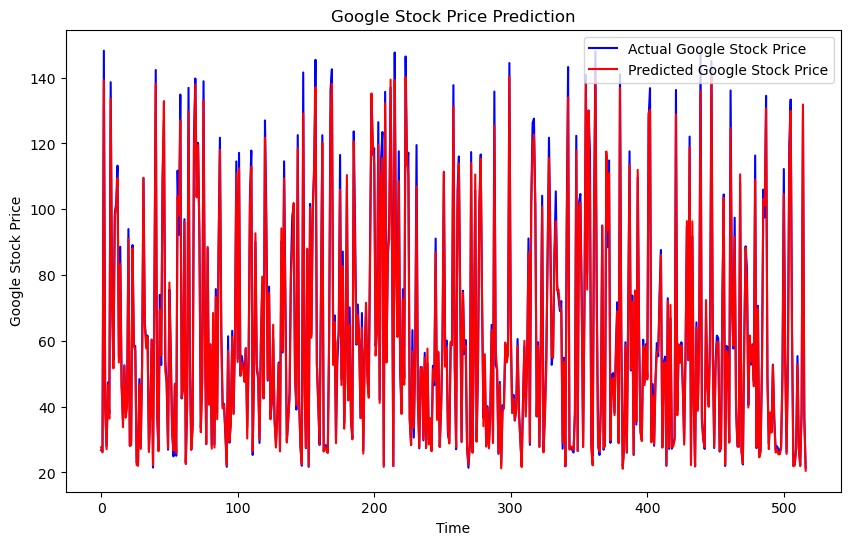

In [25]:
# Plotting the predictions against the actual values
import matplotlib.pyplot as plt

actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(actual_stock_price, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

The above chart shows a significant overlap between the actual and predicted stock prices, indicating that the model is able to capture the trend of the stock prices to some extent.
However, there is visible discrepancy where the predicted values deviate from the actual ones. This might be due to the volatile nature of stock prices, which can be influenced by many unpredictable external factors.

In [26]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Rescaling the predictions back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

17/17 [==============================] - 0s 5ms/step


In [27]:
# Calculating MSE and RMSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 9.33155224171782
RMSE: 3.0547589498547705


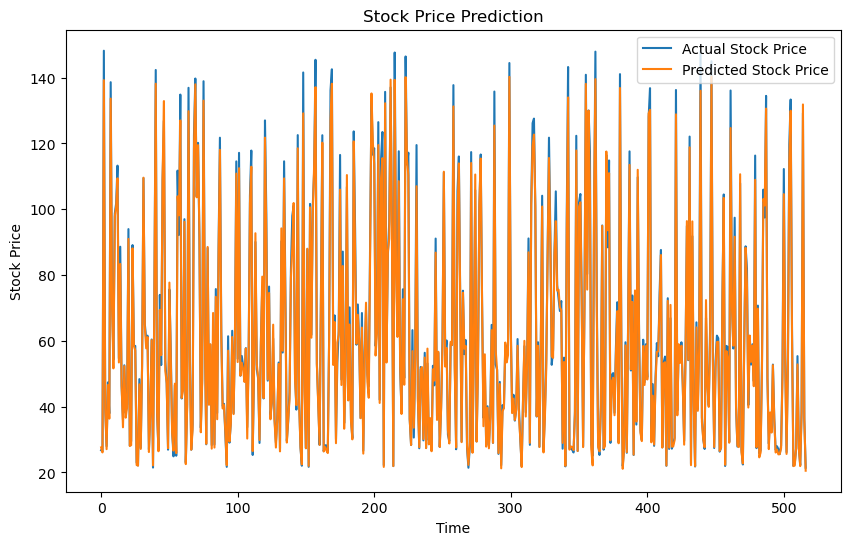

In [28]:
#plotting model's predictions with the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Stock Price')
plt.plot(y_pred_rescaled, label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Feature Selection (Random Forest Classifier )

The Random Forest Classifier is a prominent machine learning method that is used for a variety of classification problems due to its flexibility and efficacy.

Random Forests are frequently a suitable choice for classification issues, and they are widely employed in a variety of fields, including banking, healthcare, natural language processing, and many more.

However, it is crucial to note that no single algorithm is a one-size-fits-all solution, and the algorithm selected should be based on the specific characteristics of the problem being solved.


In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
df = pd.read_csv('/users/akankshanakati/downloads/GoogleStockPrice.csv')

# Let's assume 'Close' is the target variable and others are features
X = df[['Open', 'High', 'Low', 'Volume']]  # features
y = df['Close']  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

print(feature_importances)


        Importance
High      0.583226
Low       0.352464
Open      0.064267
Volume    0.000043


The above output suggest that the 'High' and 'Low' prices are the most predictive features for the 'Close' price of the stock, which aligns with common financial analysis theories where the high and low prices are often considered key indicators of market sentiment and stock value. The low importance of 'Volume' might seem counterintuitive, as trading volume is often considered an important factor in the stock market. However, it may indicate that volume is less predictive of the closing price than the price movements themselves, at least in this specific dataset.

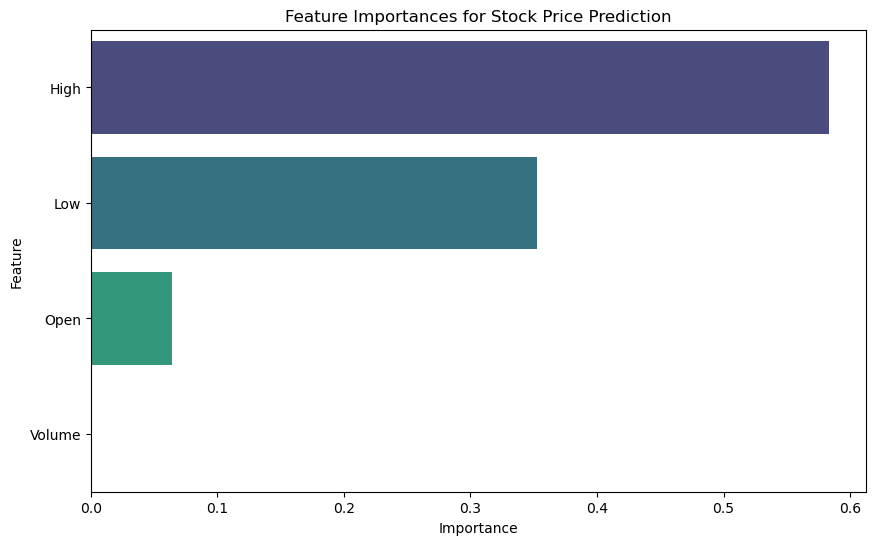

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is a DataFrame with your Random Forest feature importances

feature_importances = pd.DataFrame({
     'Feature': ['High', 'Low', 'Open', 'Volume'],
     'Importance': [0.583226, 0.352464, 0.064267, 0.000043]
 })

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")

plt.title('Feature Importances for Stock Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()


# Crafting a New Problem

With the insights gained from the above analysis, let's craft a new, related problem that focuses on the multifaceted nature of stock price predictions while introducing additional constraints to reflect real-world complexities.

### Problem Statement:
### "Predicting Google's Stock Price Movement"

Instead of predicting the exact future stock prices of Google, this new problem will focus on predicting the direction of the stock price movement (up or down) based on a combination of historical stock prices and sentiment analysis from news headlines related to Google.

Input and Output Format

Inputs:
Historical stock prices of Google for the past 'N' days. The data includes Open, High, Low, Close, and Volume for each day.

Outputs:
A binary indicator for each day in the prediction set, where '1' indicates an expected increase (or no change) in the closing price the following day, and '0' indicates an expected decrease.

# Dataset 2

Now, we'll import another dataset with different values and for seniment data we will consider it as 1.

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Loading the stock dataset
stock_data = pd.read_csv('Modified_GoogleStockPrice.csv')


# Data Profiling

In [32]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/13,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1/3/13,18.210211,18.316566,18.036036,18.109859,18.109859,92635272
2,1/4/13,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,1/7/13,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,1/8/13,18.210211,18.503002,18.128880,18.350851,18.350851,66976956


In [33]:
# Descriptive Statistics
descriptive_stats = google_stock_data.describe()
descriptive_stats

,Open,High,Low,Close,Adj Close,Volume,Close_diff
count,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000
mean,61.739577,62.384787,61.100085,61.760607,61.760607,4.250736e+07,0.038582
std,35.294951,35.734528,34.870038,35.308750,35.308750,2.654107e+07,1.335864
min,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06,-9.550003
25%,32.873126,33.216626,32.550375,32.868625,32.868625,2.695355e+07,-0.333125
50%,53.200001,53.837500,52.615499,53.348000,53.348000,3.429135e+07,0.036017
75%,86.344997,87.351374,85.528128,86.388622,86.388622,4.852085e+07,0.446753
max,151.250000,151.546494,148.899002,149.838501,149.838501,4.621933e+08,10.356003


In [34]:
# Data Quality Check
missing_values1 = stock_data.isnull().sum()
missing_values1

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values.

# Time Series Decomposition

In [35]:
# Time Range Analysis
time_range = stock_data['Date'].agg(['min', 'max'])
time_range

min    1/10/13
max     9/9/22
Name: Date, dtype: object

In [36]:
# Converting 'Date' from string to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Setting 'Date' as the index of the dataframe for time series analysis
stock_data.set_index('Date', inplace=True)

/var/folders/f1/2hklsqrn64nbmwrw2sgqqtbw0000gn/T/ipykernel_96320/464698773.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


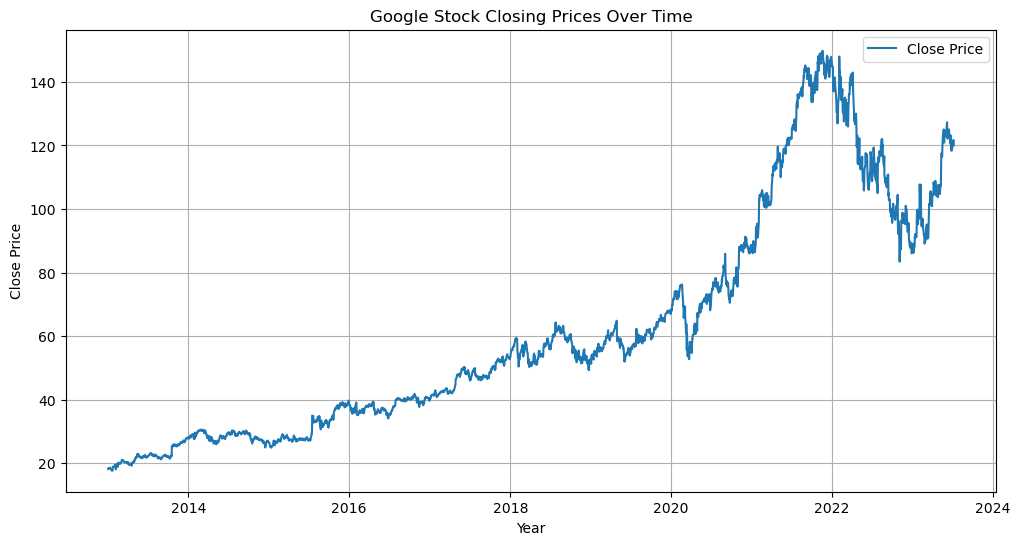

In [37]:
# Trend Analysis: Plotting Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Google Stock Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

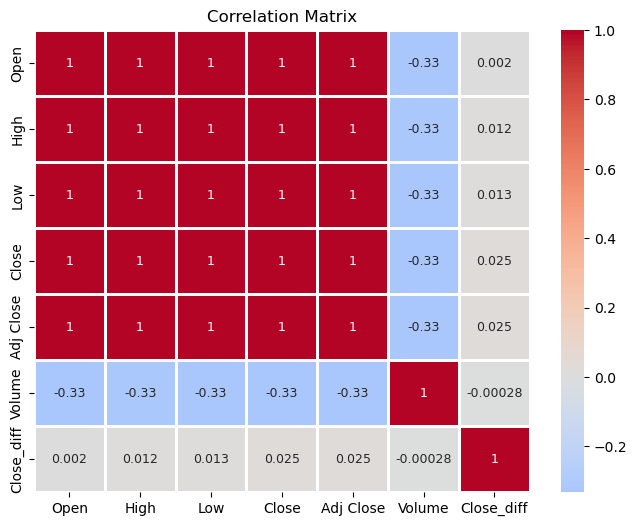

In [38]:
# Correlation Analysis
correlation_matrix = google_stock_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,center=0,linewidths=0.8, annot=True, cmap='coolwarm',annot_kws={"size": 9})
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Preprocessing the stock data
scaler = StandardScaler()
stock_data['Scaled_Close'] = scaler.fit_transform(stock_data[['Close']])

In [40]:
# For the purpose of this example, we will create a dummy sentiment score
stock_data['Sentiment_Score'] = 1  

# If the stock price increased from the previous day, we label it as 1, otherwise 0
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

In [41]:
# Drop the last row as it will not have a target value
stock_data = stock_data[:-1]

# Model Training
Using logistic Regression 

In [42]:
# Define features and target
X1 = stock_data[['Scaled_Close', 'Sentiment_Score']]
y1 = stock_data['Target']

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X1_train, y1_train)

LogisticRegression()

# Results, data, and tables

In [43]:
# Make predictions
y1_pred = logistic_model.predict(X1_test)

# Evaluate the model
print(classification_report(y1_test, y1_pred))
print(f"Model Accuracy: {accuracy_score(y1_test, y1_pred)}")

# Sample predictions
print(f"Sample Predictions: {y1_pred[:5]}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       256
           1       0.52      1.00      0.68       273

    accuracy                           0.52       529
   macro avg       0.26      0.50      0.34       529
weighted avg       0.27      0.52      0.35       529

Model Accuracy: 0.5160680529300568
Sample Predictions: [1 1 1 1 1]


/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akankshanakati/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above, we can analyze that even after changing the values in the dataset the accuracy of the logistic regression model is 51% but this metric can be misleading in the context of imbalanced datasets. From the above resuts, 0 indicates that there is an expected decrease in the stock price and 1 indicates a increase. precison of 1 is 0.52 which indicates that the model will predict corectly the increase in stock prices but as precision of 0 is 0 it wont predict the decrease or constat correctly. recall is 1 for 1 which indicates that the model correctly identified all class 1 instances.

# Conclusion

Finally, This assignment demonstrates the application of both logistic regression and LSTM models in predicting stock price movements, highlighting the nuances and complexities of financial time series analysis. The logistic regression model provides a baseline understanding but is limited in its predictive capabilities, particularly in dealing with imbalanced datasets and in predicting decreases in stock prices. On the other hand, the LSTM model leverages its strength in handling sequential data and learning long-term dependencies, potentially offering more accurate and robust predictions. However, it also faces challenges such as the need for large datasets and computational intensity. The juxtaposition of these two models in the assignment underscores the importance of choosing the right model based on the nature of the data and the specific requirements of the analysis. Future enhancements could include optimizing model parameters, incorporating a wider range of features, and exploring hybrid models that combine the strengths of both logistic regression and LSTM networks.

# References

1. Dataset: https://www.kaggle.com/code/jillanisofttech/google-stock-price-prediction-using-lstm-dl
2. Owner - AI Skunkworks Link: https://github.com/aiskunks/Skunks_Skool
3. The Ultimate Guide to Time-Series Analysis: https://www.timescale.com/blog/what-is-time-series-analysis-with-examples-and-applications/
4. Predicting Stock Prices with LSTM and GRU: https://blog.gopenai.com/predicting-stock-prices-with-lstm-and-gru-a-step-by-step-guide-381ec1554edf
5. Code Reference: https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/Understanding_Data

# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.